# Animal Classification
#### Dataset = https://www.kaggle.com/datasets/ayushv322/animal-classification/code

#### Team Member :
1. Fathika Afrine Azaruddin (5027211016)
2. Sulthan Akmal Rafliansyah (5027211039)

### 1. Import Modules

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.0
    Uninstalling keras-3.0.0:
      Successfully uninstalled keras-3.0.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/24/63/bbc83d949e1940d079dcd1cd87e31498bfb71d641c8e33d917ca3f2e51a9/keras-3.0.0-py3-none-any.whl.metadata
  Using cached keras-3.0.0-py3-none-any.whl.metadata (5.3 kB)
Using cached keras-3.0.0-py3-none-any.whl (997 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.0 which is incompatible.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import utils

### 2. Data Discovery

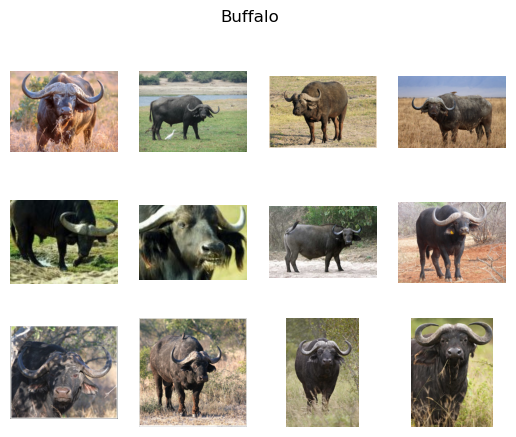

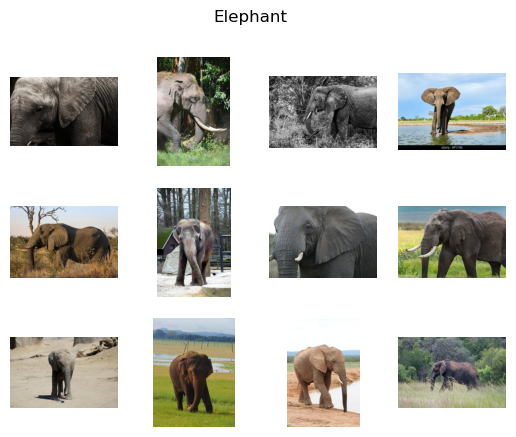

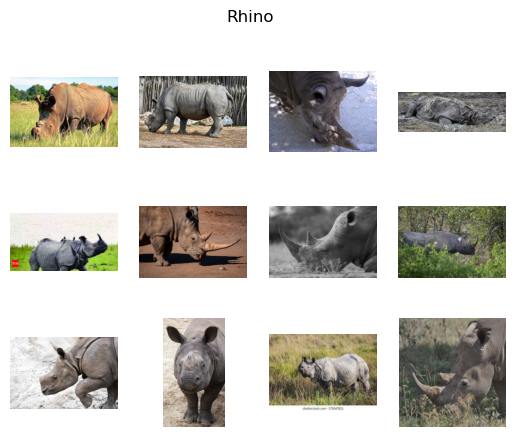

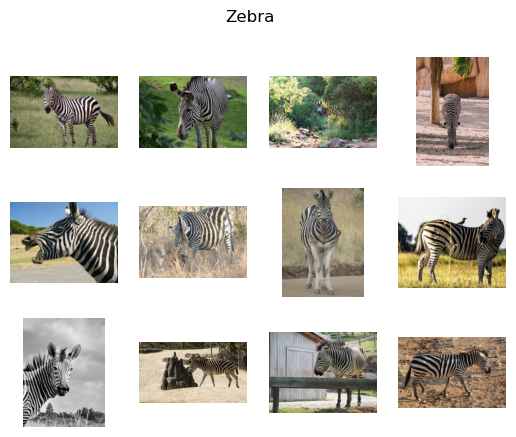

In [6]:
path = '../Downloads/ine/Tugas 3/Data/'

# animal categories
categories = ['Buffalo', 'Elephant', 'Rhino', 'Zebra']

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [7]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

Buffalo  => height min :  136 width min :  400
Buffalo  => height max :  601 width max :  400
Elephant  => height min :  171 width min :  400
Elephant  => height max :  711 width max :  400
Rhino  => height min :  103 width min :  400
Rhino  => height max :  964 width max :  400
Zebra  => height min :  124 width min :  400
Zebra  => height max :  719 width max :  400


In [8]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['../Downloads/ine/Tugas 3/Data/Buffalo/Buffalo_595.jpg', 0], ['../Downloads/ine/Tugas 3/Data/Rhino/Rhino_750.jpg', 2], ['../Downloads/ine/Tugas 3/Data/Rhino/Rhino_907.jpg', 2], ['../Downloads/ine/Tugas 3/Data/Elephant/Elephant_444.jpg', 1], ['../Downloads/ine/Tugas 3/Data/Elephant/Elephant_370.jpg', 1], ['../Downloads/ine/Tugas 3/Data/Rhino/Rhino_66.jpg', 2], ['../Downloads/ine/Tugas 3/Data/Zebra/Zebra_665.jpg', 3], ['../Downloads/ine/Tugas 3/Data/Elephant/Elephant_536.jpg', 1], ['../Downloads/ine/Tugas 3/Data/Buffalo/Buffalo_522.jpg', 0], ['../Downloads/ine/Tugas 3/Data/Elephant/Elephant_118.jpg', 1]]


In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

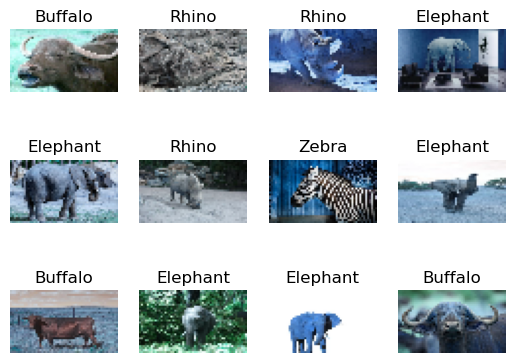

In [10]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [11]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

### 3. Preprocessing

In [12]:
# Preprocess class labels
trainY = utils.to_categorical(trainY, 4)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(3185, 32, 55, 3)
(797, 32, 55, 3)
(3185, 4)
(797,)


In [13]:
model = Sequential()

# Add a normalization layer
model.add(BatchNormalization(input_shape=(HEIGHT, WIDTH, N_CHANNELS)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

c:\Users\Jupi\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:137: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 55, 3)         │         12 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 53, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 26, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 24, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 12, 64)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 10, 128)        │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 5, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 2, 5, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 1280)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │    163,968 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 4)                 │        516 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 257,744 (1006.81 KB)

 Trainable params: 257,738 (1006.79 KB)

 Non-trainable params: 6 (24.00 B)

None


In [14]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.4308 - loss: 1.2323
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6146 - loss: 0.8711
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.7130 - loss: 0.7492
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7296 - loss: 0.6701
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.7653 - loss: 0.5780
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7962 - loss: 0.5291
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8047 - loss: 0.4919
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8291 - loss: 0.4354
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.8544 - loss: 0.3859
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8757 - loss: 0.3122
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8950 - loss: 0.2937
Epoch 12/25
100/100 ━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


C:\Users\Jupi\AppData\Local\Temp\ipykernel_12040\2605312693.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\Jupi\AppData\Local\Temp\ipykernel_12040\2605312693.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


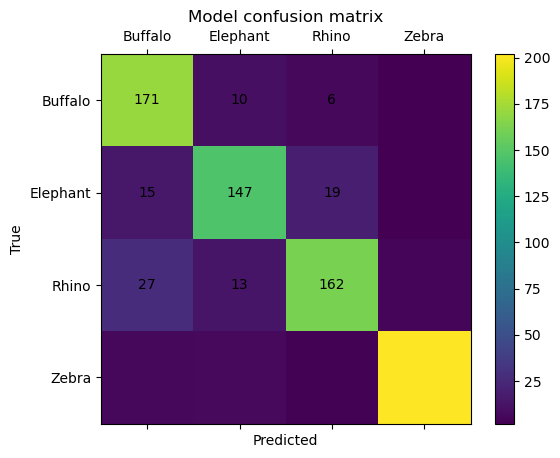

Accuracy : 85.57%


In [15]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))